In [4]:
pip install --user --upgrade tensorflow 

     |████████████████████████████████| 199.0 MB 54 kB/s s eta 0:00:01
     |████████████████████████████████| 462 kB 65.0 MB/s eta 0:00:01
     |████████████████████████████████| 15.6 MB 11.6 MB/s eta 0:00:01
     |████████████████████████████████| 132 kB 33.1 MB/s eta 0:00:01
     |████████████████████████████████| 1.3 MB 41.3 MB/s eta 0:00:01
     |████████████████████████████████| 42 kB 3.4 MB/s  eta 0:00:01
     |████████████████████████████████| 1.0 MB 20.5 MB/s eta 0:00:01
     |████████████████████████████████| 2.9 MB 31.7 MB/s eta 0:00:01
     |████████████████████████████████| 57 kB 9.7 MB/s  eta 0:00:01
     |████████████████████████████████| 3.9 MB 63.0 MB/s eta 0:00:01
     |████████████████████████████████| 5.6 MB 27.6 MB/s eta 0:00:01
     |████████████████████████████████| 65 kB 7.1 MB/s  eta 0:00:01
     |████████████████████████████████| 781 kB 27.4 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 9.7 MB/s  eta 0:00:01
  Using cached google_auth-1.35.0-p

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install folium

     |████████████████████████████████| 94 kB 2.8 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install geopandas

     |████████████████████████████████| 994 kB 3.1 MB/s eta 0:00:01
     |████████████████████████████████| 7.6 MB 23.8 MB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 23.8 MB/s eta 0:00:01
     |████████████████████████████████| 19.3 MB 939 kB/s eta 0:00:01
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.preprocessing import LabelEncoder
import re
import datetime
import folium
import geopandas as gpd
from shapely.geometry import Point, Polygon
from geopandas import GeoDataFrame
import math
from folium.plugins import HeatMap, MarkerCluster
from folium import Marker,GeoJson,Choropleth, Circle

In [2]:
data_time_age = pd.read_csv('TimeAge.csv')
data_time_gender = pd.read_csv('TimeGender.csv')

In [3]:
data_time_age

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
...,...,...,...,...,...
1084,2020-06-30,0,40s,1681,3
1085,2020-06-30,0,50s,2286,15
1086,2020-06-30,0,60s,1668,41
1087,2020-06-30,0,70s,850,82


In [4]:
data_time_gender

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
...,...,...,...,...,...
237,2020-06-28,0,female,7265,131
238,2020-06-29,0,male,5470,151
239,2020-06-29,0,female,7287,131
240,2020-06-30,0,male,5495,151


In [5]:
data_time_age.head(10)

,date,time,age,confirmed,deceased
0,2020-03-02,0,0s,32,0
1,2020-03-02,0,10s,169,0
2,2020-03-02,0,20s,1235,0
3,2020-03-02,0,30s,506,1
4,2020-03-02,0,40s,633,1
5,2020-03-02,0,50s,834,5
6,2020-03-02,0,60s,530,6
7,2020-03-02,0,70s,192,6
8,2020-03-02,0,80s,81,3
9,2020-03-03,0,0s,34,0


In [6]:
data_time_gender.head(10)

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20
5,2020-03-04,0,female,3332,12
6,2020-03-05,0,male,2149,21
7,2020-03-05,0,female,3617,14
8,2020-03-06,0,male,2345,25
9,2020-03-06,0,female,3939,17


# Removing the string from the 'age' column to get only integers

In [7]:
data_time_age['age'] =  data_time_age['age'].str.rstrip('s')

In [8]:
data_time_age.head()

,date,time,age,confirmed,deceased
0,2020-03-02,0,0,32,0
1,2020-03-02,0,10,169,0
2,2020-03-02,0,20,1235,0
3,2020-03-02,0,30,506,1
4,2020-03-02,0,40,633,1


In [9]:
# Renaming the 'age' column

data_time_age.rename(columns = {'age':'age_group'}, inplace = True)

In [10]:
data_time_age.head()

,date,time,age_group,confirmed,deceased
0,2020-03-02,0,0,32,0
1,2020-03-02,0,10,169,0
2,2020-03-02,0,20,1235,0
3,2020-03-02,0,30,506,1
4,2020-03-02,0,40,633,1


# A plot of age group and confirmed cases show those in their 20s with the highest numbers

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_group', ylabel='confirmed'>

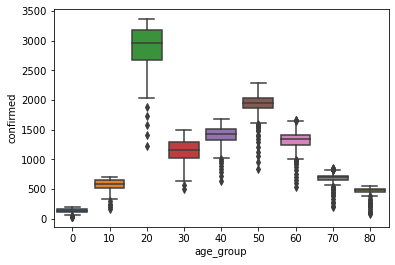

In [11]:
sns.boxplot('age_group', 'confirmed', data = data_time_age) 

# A line plot of the age group and deceased show the number of deaths increase with age

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_group', ylabel='deceased'>

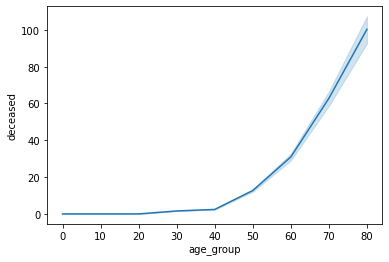

In [12]:
sns.lineplot('age_group', 'deceased', data = data_time_age)  

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='confirmed', ylabel='deceased'>

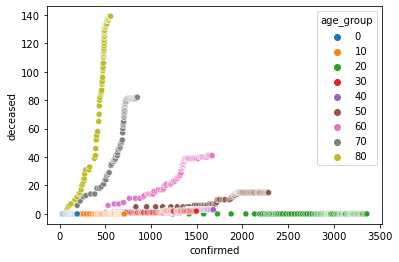

In [13]:
sns.scatterplot('confirmed', 'deceased', data = data_time_age, hue = 'age_group')

In [14]:
data_time_age.date.value_counts()

2020-06-10    9
2020-05-31    9
2020-06-28    9
2020-03-29    9
2020-04-29    9
             ..
2020-04-22    9
2020-06-03    9
2020-06-11    9
2020-06-07    9
2020-04-17    9
Name: date, Length: 121, dtype: int64

In [15]:
time = data_time_age.groupby('date', as_index = True).sum()

In [16]:
time

,time,confirmed,deceased
date,,,
2020-03-02,0,4212,22
2020-03-03,0,4812,28
2020-03-04,0,5328,32
2020-03-05,0,5766,35
2020-03-06,0,6284,42
...,...,...,...
2020-06-26,0,12602,282
2020-06-27,0,12653,282
2020-06-28,0,12715,282


/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='confirmed', ylabel='deceased'>

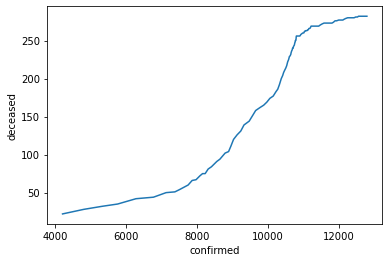

In [17]:
sns.lineplot('confirmed', 'deceased', data = time) # The number of deaths was definitely reaching a plateau

In [18]:
data_time_age.time.value_counts() 

0    1089
Name: time, dtype: int64

# The data is a time series of COVID-19 status in terms of gender in South Korea

In [19]:
data_time_gender.head() 

,date,time,sex,confirmed,deceased
0,2020-03-02,0,male,1591,13
1,2020-03-02,0,female,2621,9
2,2020-03-03,0,male,1810,16
3,2020-03-03,0,female,3002,12
4,2020-03-04,0,male,1996,20


In [20]:
data_time_gender.time.value_counts()

0    242
Name: time, dtype: int64

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='confirmed'>

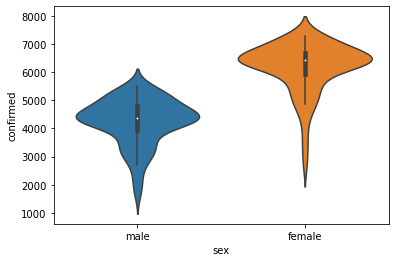

In [21]:
sns.violinplot('sex', 'confirmed', data = data_time_gender)  

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='sex', ylabel='deceased'>

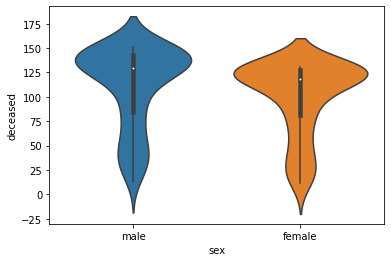

In [22]:
sns.violinplot('sex', 'deceased', data = data_time_gender)

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deceased', ylabel='confirmed'>

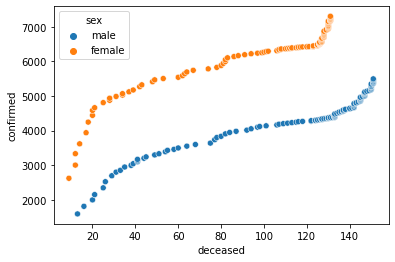

In [23]:
sns.scatterplot('deceased', 'confirmed', data = data_time_gender, hue = 'sex')

# A graph of date and deceased show a climb in deaths as time progresses

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deceased', ylabel='date'>

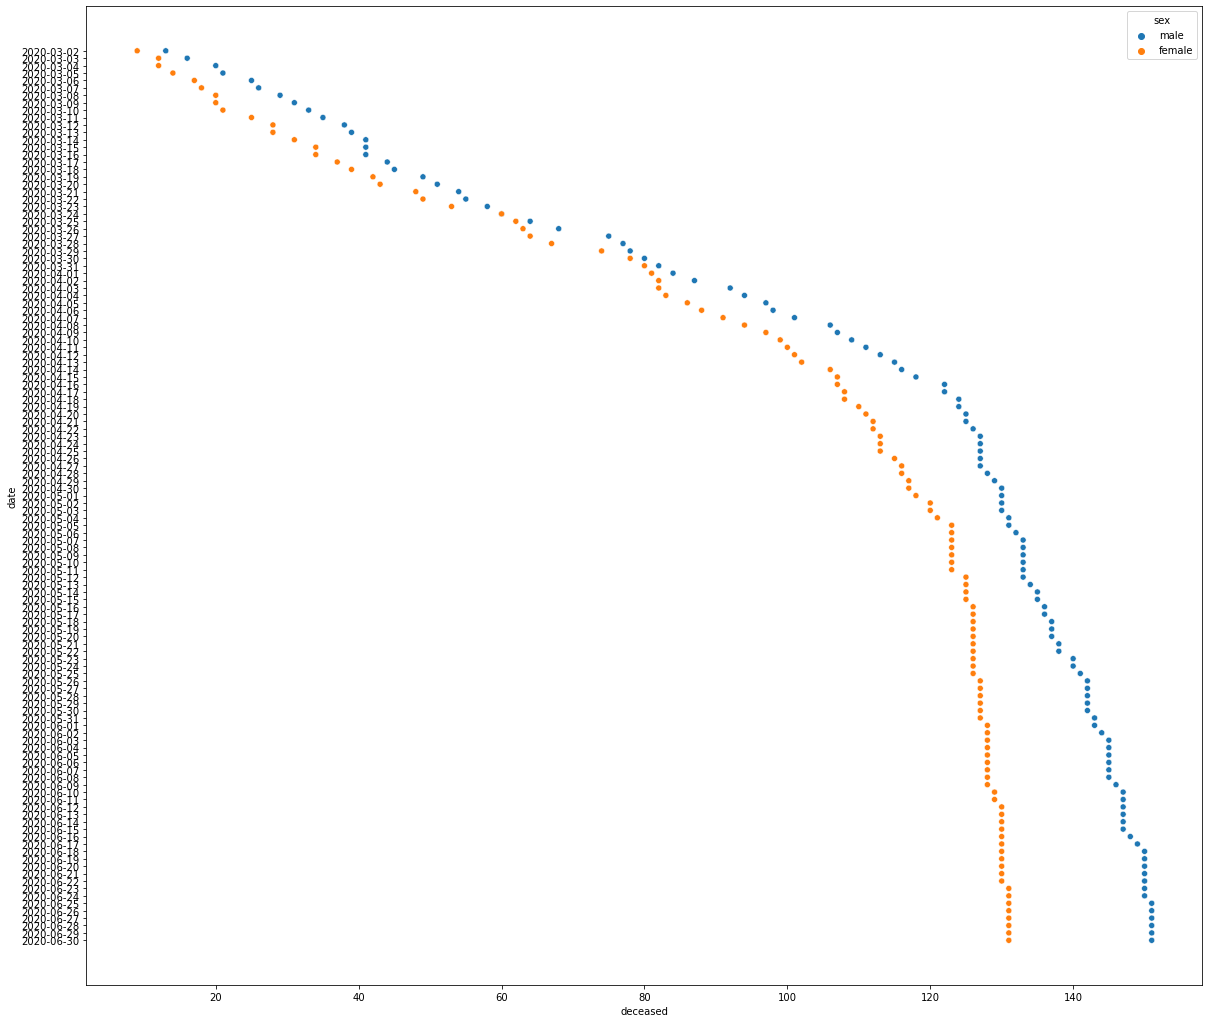

In [25]:
plt.figure(figsize = (20, 18))
sns.scatterplot('deceased', 'date', data = data_time_gender, hue = 'sex')

# Grouping by the date and summing it up gives the total deceased

In [26]:
gender = data_time_gender.groupby('date').sum()

In [27]:
gender

,time,confirmed,deceased
date,,,
2020-03-02,0,4212,22
2020-03-03,0,4812,28
2020-03-04,0,5328,32
2020-03-05,0,5766,35
2020-03-06,0,6284,42
...,...,...,...
2020-06-26,0,12602,282
2020-06-27,0,12653,282
2020-06-28,0,12715,282


# The graph below shows the total diseased versus confirmed

/Users/lenovo1/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='deceased', ylabel='confirmed'>

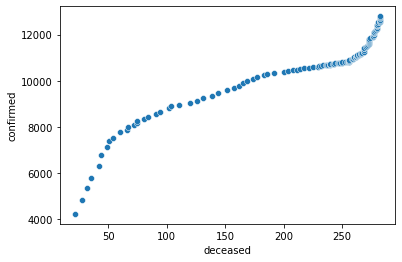

In [28]:
sns.scatterplot('deceased', 'confirmed', data = gender)